In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [17]:
train = pd.read_csv("../data/SQuAD-PL/train.csv")

In [18]:
train

,qa_id,group_id,passage_id,context,question,answer_text,answer_start
0,0,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyonce zaczęła być popularna?,pod koniec lat 90.,264
1,2,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyonce opuściła Destiny's Child i zosta...,2003,550
2,4,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,W której dekadzie Beyonce stała się sławna?,koniec lat 90.,268
3,8,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyoncé zyskała sławę?,koniec lat 90.,268
4,11,0,0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Kiedy Beyoncé wydała Dangerously In Love?,2003,550
...,...,...,...,...,...,...,...
69529,130314,441,28,Termin „materia” jest używany w fizyce w oszał...,Fizyka szeroko zgodziła się na definicję czego?,NaN,0
69530,130315,441,28,Termin „materia” jest używany w fizyce w oszał...,Kto ukuł termin materia partonic?,NaN,0
69531,130316,441,28,Termin „materia” jest używany w fizyce w oszał...,Jaka jest inna nazwa antymaterii?,NaN,0
69532,130317,441,28,Termin „materia” jest używany w fizyce w oszał...,Materii zwykle nie trzeba używać w połączeniu ...,NaN,0


763.7733080697664 321.29350417714977


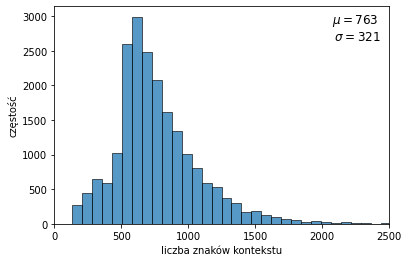

In [50]:
temp = []
for c in train["context"].unique():
    temp.append(len(c))

print(np.mean(temp), np.std(temp))

ax = sns.histplot(temp, bins=50)
plt.xlabel("liczba znaków kontekstu")
plt.ylabel("częstość")
plt.text(0.9, 0.9, "$\mu=763$ \n $\sigma=321$", horizontalalignment="center", verticalalignment="center", transform=ax.transAxes, fontsize=12)
plt.xlim(0, 2500)
plt.savefig("train_context_chars.svg")

57.73361388136277 21.42736194852199


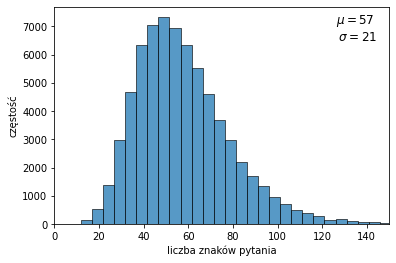

In [51]:
temp = []
for c in train["question"].unique():
    temp.append(len(c))

print(np.mean(temp), np.std(temp))

ax = sns.histplot(temp, bins=50)
plt.xlabel("liczba znaków pytania")
plt.ylabel("częstość")
plt.text(0.9, 0.9, "$\mu=57$ \n $\sigma=21$", horizontalalignment="center", verticalalignment="center", transform=ax.transAxes, fontsize=12)
plt.xlim(0, 150)
plt.savefig("train_question_chars.svg")

In [5]:
test = pd.read_csv("../data/SQuAD-PL/test.csv")

In [6]:
test

,qa_id,group_id,passage_id,context,question,answer_text,answer_start
0,4,0,0,Normanowie (Norman: Nourmands; francuski: Norm...,Kiedy Normanowie byli w Normandii?,X i XI wiek,88
1,5,0,0,Normanowie (Norman: Nourmands; francuski: Norm...,Kiedy Normanowie byli w Normandii?,w X i XI wieku,86
2,7,0,0,Normanowie (Norman: Nourmands; francuski: Norm...,Kiedy Normanowie byli w Normandii?,X i XI wiek,88
3,12,0,0,Normanowie (Norman: Nourmands; francuski: Norm...,Kim był przywódca nordycki?,Rollo,274
4,13,0,0,Normanowie (Norman: Nourmands; francuski: Norm...,Kim był przywódca nordycki?,Rollo,274
...,...,...,...,...,...,...,...
11885,26228,34,43,"Funt-siła ma metryczny odpowiednik, rzadziej u...",Jaka jest bardzo rzadko używana jednostka masy...,ślimak,262
11886,26243,34,43,"Funt-siła ma metryczny odpowiednik, rzadziej u...",Co nie ma odpowiednika metrycznego?,NaN,0
11887,26244,34,43,"Funt-siła ma metryczny odpowiednik, rzadziej u...",Jaka jest siła wywierana przez standardową gra...,NaN,0
11888,26245,34,43,"Funt-siła ma metryczny odpowiednik, rzadziej u...",Jaka siła prowadzi do powszechnie używanej jed...,NaN,0
